In [2]:
# Read the csv file and leave required columns 
attrition <- read.csv("employee_attrition.csv")
attrition <- data.frame(attrition)

In [80]:
# Load required packages 

library("sandwich")
library("lmtest")
library("MASS")
library("mfx")
library("BaylorEdPsych")
library("htmltools")
#library("LogisticDx")
library("aod")
library("logistf")
library(corrplot)
library(repr)


In [33]:
# Check all columns 
names(attrition)

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeCount"            "EmployeeNumber"          
[11] "EnvironmentSatisfaction"  "Gender"                  
[13] "HourlyRate"               "JobInvolvement"          
[15] "JobLevel"                 "JobRole"                 
[17] "JobSatisfaction"          "MaritalStatus"           
[19] "MonthlyIncome"            "MonthlyRate"             
[21] "NumCompaniesWorked"       "Over18"                  
[23] "OverTime"                 "PercentSalaryHike"       
[25] "PerformanceRating"        "RelationshipSatisfaction"
[27] "StandardHours"            "StockOptionLevel"        
[29] "TotalWorkingYears"        "TrainingTimesLastYear"   
[31] "WorkLifeBalance"          "YearsAtCompany"          
[33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
[35] "YearsWithCurrManager"

In [3]:
# Replace attrition with binary variable 
attrition$Attrition <- ifelse(attrition$Attrition == "Yes", 1, 
                              ifelse(attrition$Attrition == "No", 0, NA))

In [4]:
# Lower column names 
colnames(attrition) <- tolower(colnames(attrition))


In [6]:
# Change chacacter variables to factors 
attrition$businesstravel <- as.factor(attrition$businesstravel)
attrition$department <- as.factor(attrition$department)
attrition$educationfield <- as.factor(attrition$educationfield)
attrition$gender <- as.factor(attrition$gender)
attrition$jobrole <- as.factor(attrition$jobrole)
attrition$maritalstatus <- as.factor(attrition$maritalstatus)
attrition$over18 <- as.factor(attrition$over18)
attrition$overtime <- as.factor(attrition$overtime)

In [24]:
# Remove "employeecount" and "over18" columns
attrition <- attrition[ , !(names(attrition) %in% c("employeecount", "over18", "standardhours"))]

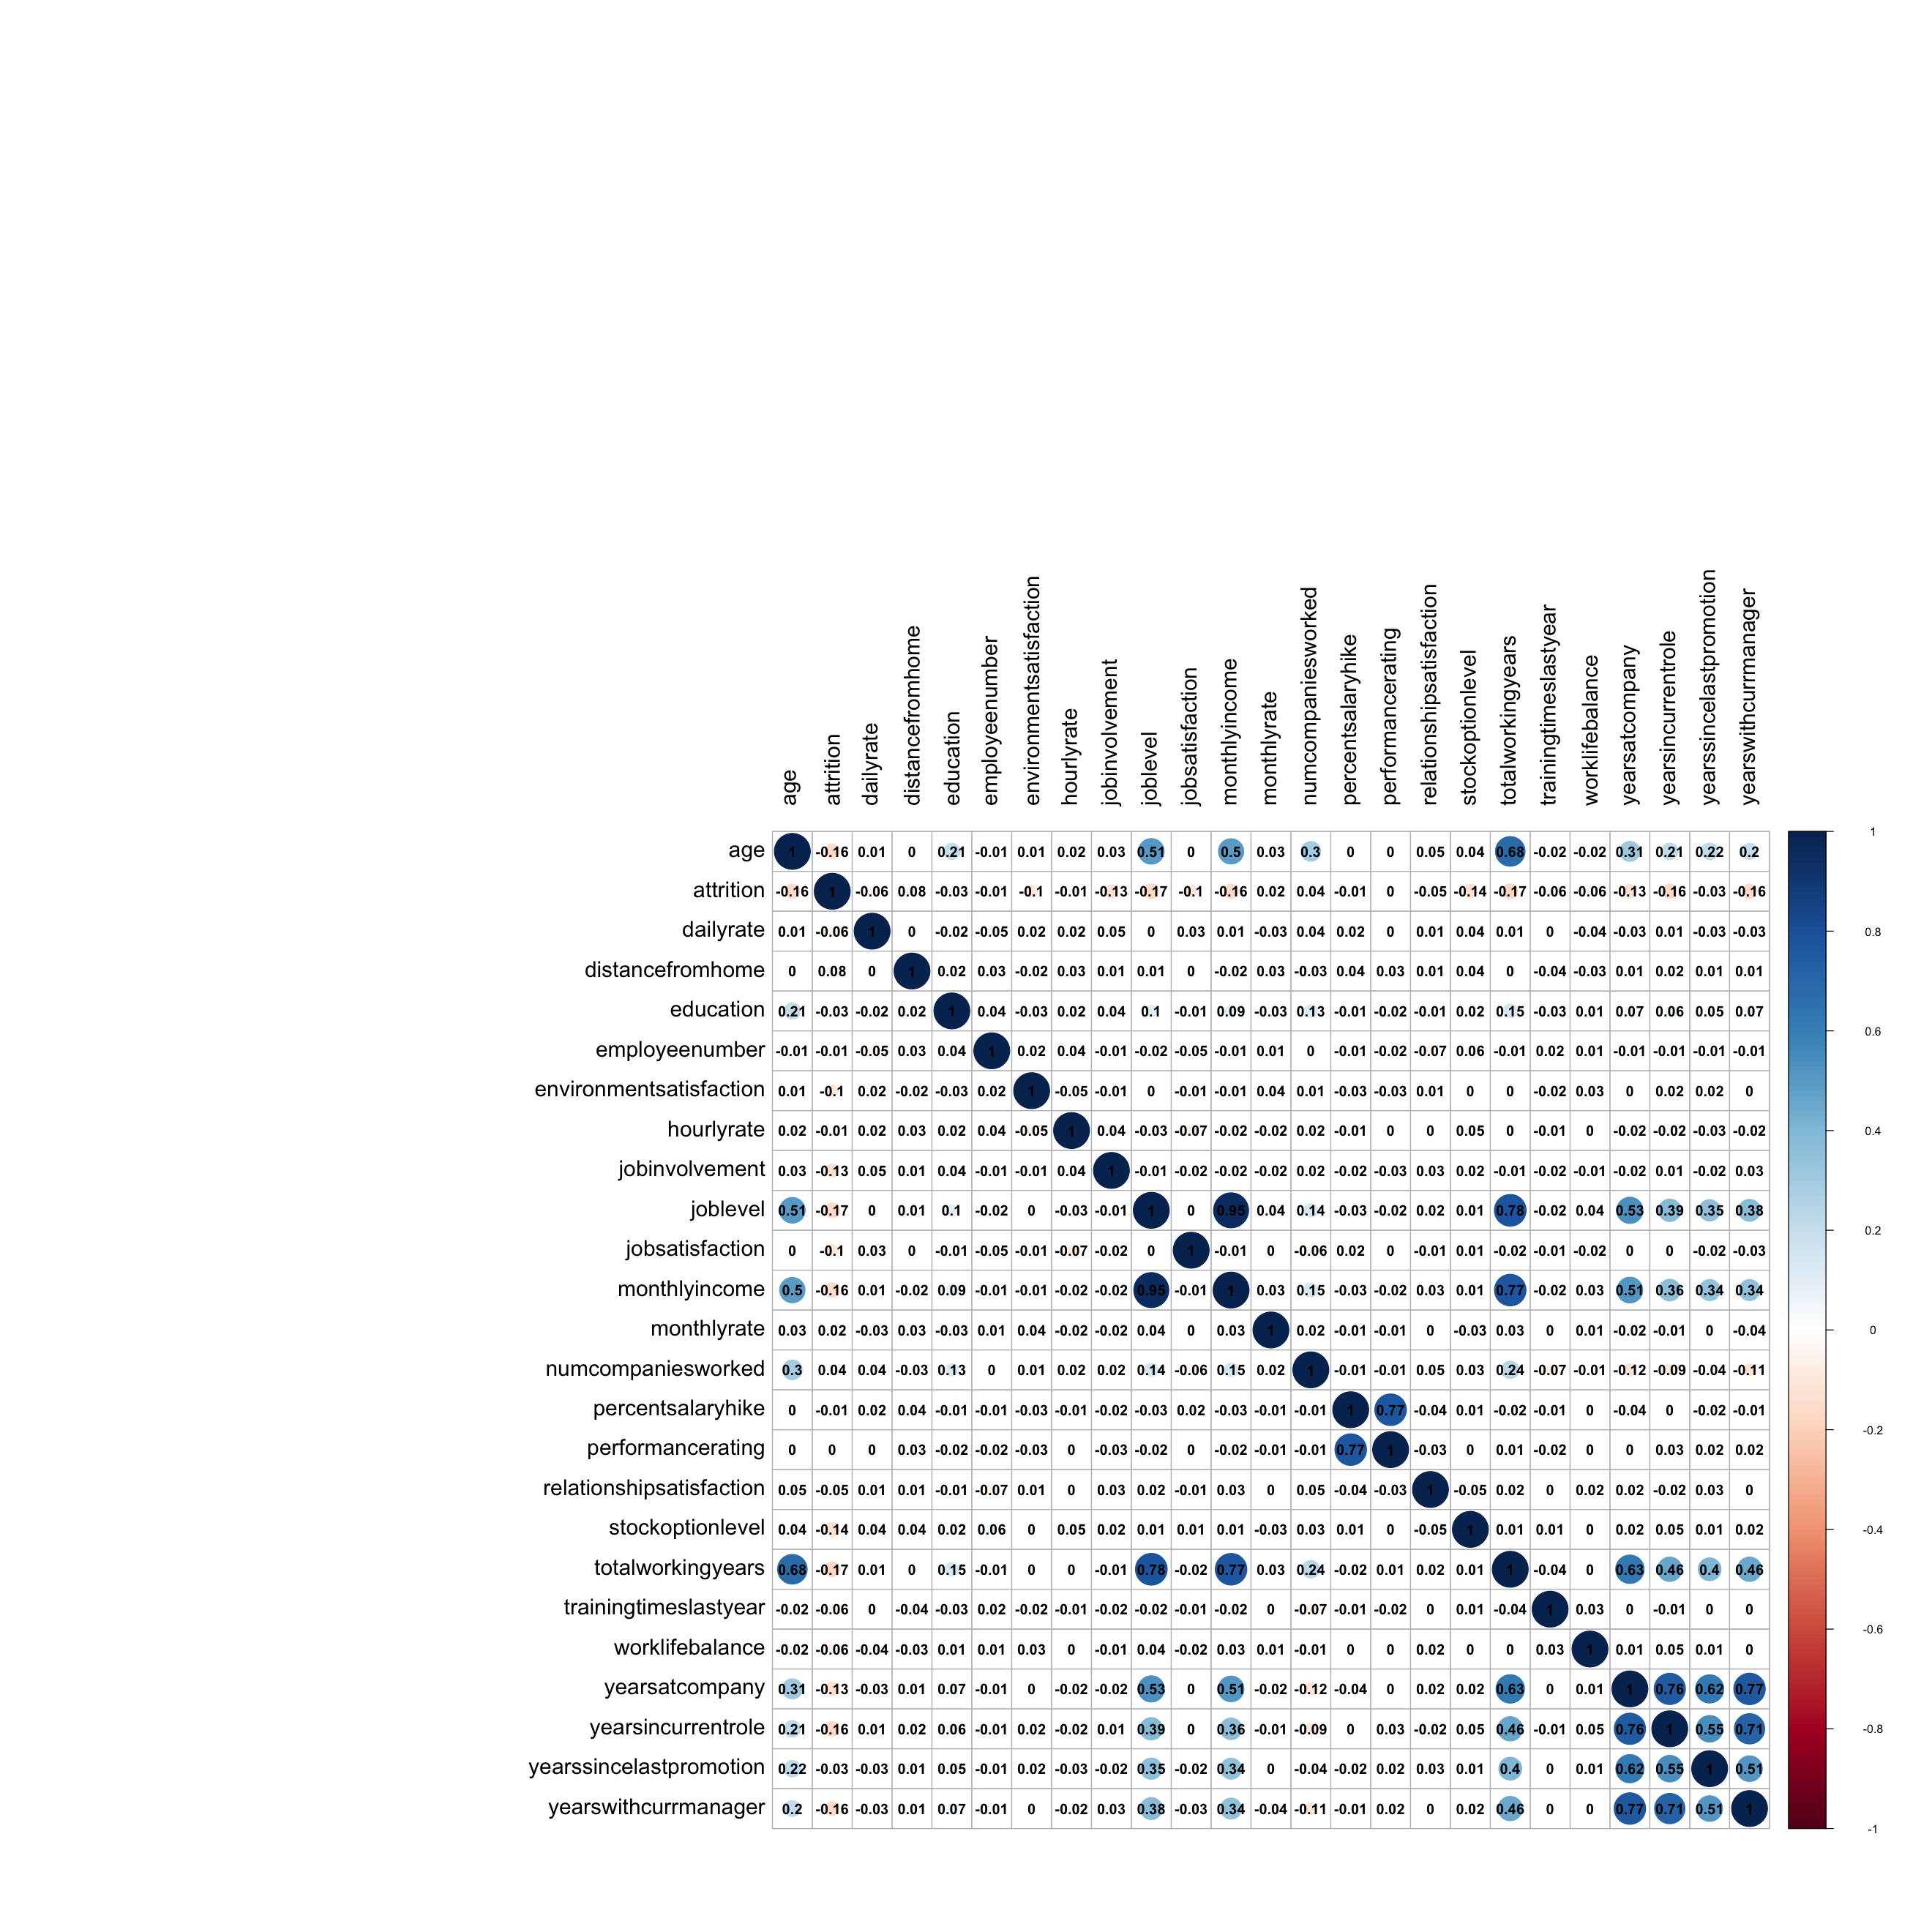

In [81]:
# Set the plot size in the Jupyter notebook
options(repr.plot.width = 22, repr.plot.height = 22)

# Subset the dataframe to include only numeric columns
attrition_numeric <- attrition[sapply(attrition, is.numeric)]

# Calculate the correlation matrix
cor_matrix <- cor(attrition_numeric)

# Create the correlation plot
corrplot(cor_matrix, method = "circle", tl.cex = 1.5, tl.col = "black", 
         addCoef.col = "black", number.cex = 1)

In [82]:
# Fit the model after removing highly correlated variables to avoid multicollinearity 
model <- glm(attrition ~ age + businesstravel + dailyrate + distancefromhome + education + educationfield + employeenumber + environmentsatisfaction + gender + hourlyrate + jobinvolvement  + jobsatisfaction + maritalstatus + monthlyincome + monthlyrate + numcompaniesworked + overtime + percentsalaryhike + performancerating + relationshipsatisfaction  + stockoptionlevel  + trainingtimeslastyear + worklifebalance + yearsatcompany + yearsincurrentrole, data = attrition, family = binomial(link = "logit"))

summary(model)

# Calculate Variance Inflation Factor to check for multicollinearity
vif(model)


Call:
glm(formula = attrition ~ age + businesstravel + dailyrate + 
    distancefromhome + education + educationfield + employeenumber + 
    environmentsatisfaction + gender + hourlyrate + jobinvolvement + 
    jobsatisfaction + maritalstatus + monthlyincome + monthlyrate + 
    numcompaniesworked + overtime + percentsalaryhike + performancerating + 
    relationshipsatisfaction + stockoptionlevel + trainingtimeslastyear + 
    worklifebalance + yearsatcompany + yearsincurrentrole, family = binomial(link = "logit"), 
    data = attrition)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8091  -0.5148  -0.2989  -0.1267   3.2578  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      3.799e+00  1.372e+00   2.770 0.005610 ** 
age                             -4.347e-02  1.185e-02  -3.667 0.000245 ***
businesstravelTravel_Frequently  1.807e+00  3.988e-01   4.531 5.88e-06 ***
businesstravelTravel_Rar

,GVIF,Df,GVIF^(1/(2*Df))
age,1.493452,1,1.222069
businesstravel,1.100014,2,1.024117
dailyrate,1.032307,1,1.016025
distancefromhome,1.066430,1,1.032681
education,1.102000,1,1.049762
educationfield,1.229788,5,1.020900
employeenumber,1.057441,1,1.028320
environmentsatisfaction,1.063445,1,1.031235
gender,1.039988,1,1.019798
hourlyrate,1.020360,1,1.010128


In [83]:
# Calculate marginal effects
logitmfx(formula = attrition ~ age + businesstravel + dailyrate + distancefromhome + education + educationfield + employeenumber + environmentsatisfaction + gender + hourlyrate + jobinvolvement  + jobsatisfaction + maritalstatus + monthlyincome + monthlyrate + numcompaniesworked + overtime + percentsalaryhike + performancerating + relationshipsatisfaction  + stockoptionlevel  + trainingtimeslastyear + worklifebalance + yearsatcompany + yearsincurrentrole, robust = FALSE, data=attrition)

Call:
logitmfx(formula = attrition ~ age + businesstravel + dailyrate + 
    distancefromhome + education + educationfield + employeenumber + 
    environmentsatisfaction + gender + hourlyrate + jobinvolvement + 
    jobsatisfaction + maritalstatus + monthlyincome + monthlyrate + 
    numcompaniesworked + overtime + percentsalaryhike + performancerating + 
    relationshipsatisfaction + stockoptionlevel + trainingtimeslastyear + 
    worklifebalance + yearsatcompany + yearsincurrentrole, data = attrition, 
    robust = FALSE)

Marginal Effects:
                                      dF/dx   Std. Err.       z     P>|z|    
age                             -3.1949e-03  8.8799e-04 -3.5979 0.0003208 ***
businesstravelTravel_Frequently  2.1519e-01  6.6010e-02  3.2600 0.0011140 ** 
businesstravelTravel_Rarely      6.0478e-02  2.0340e-02  2.9734 0.0029452 ** 
dailyrate                       -2.1178e-05  1.5533e-05 -1.3634 0.1727496    
distancefromhome                 2.9987e-03  7.5143e-04  3.

In [84]:
# R-squared statistics
PseudoR2(model)


McFadden     Adj.McFadden        Cox.Snell       Nagelkerke 
       0.2866339        0.2358092        0.2236947        0.3813277 
McKelvey.Zavoina           Effron            Count        Adj.Count 
       0.4851926        0.3269318        0.8863946        0.2953586 
             AIC    Corrected.AIC 
     990.3648888      991.8346174

In [85]:
# Perform the link test to check if model specification is correct and it performs better than model without independent variables 
link_test <- lrtest(model)

# Print the test results
print(link_test)

Likelihood ratio test

Model 1: attrition ~ age + businesstravel + dailyrate + distancefromhome + 
    education + educationfield + employeenumber + environmentsatisfaction + 
    gender + hourlyrate + jobinvolvement + jobsatisfaction + 
    maritalstatus + monthlyincome + monthlyrate + numcompaniesworked + 
    overtime + percentsalaryhike + performancerating + relationshipsatisfaction + 
    stockoptionlevel + trainingtimeslastyear + worklifebalance + 
    yearsatcompany + yearsincurrentrole
Model 2: attrition ~ 1
  #Df  LogLik  Df  Chisq Pr(>Chisq)    
1  32 -463.18                          
2   1 -649.29 -31 372.22  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


ERROR: Error in gof(model): could not find function "gof"
